In [4]:
import os
import sys

import numpy as np
sys.path.append("/workspaces/InterviewPrep/ML_algos")

import LinearRegression as lr
from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib.pyplot as plt

In [5]:
X,y = datasets.make_regression(n_samples=1000,n_features=1,noise=20,random_state=4)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

regressor = lr.LinearRegression()
regressor.fit(X_train,y_train)
predictions = regressor.predict(X_test)

def mse(y_true,y_pred):
    return np.mean((y_true-y_pred)**2)

mse_value = mse(y_test,predictions)
print(mse_value)

(1000, 1) (1000,)
383.25596550180677


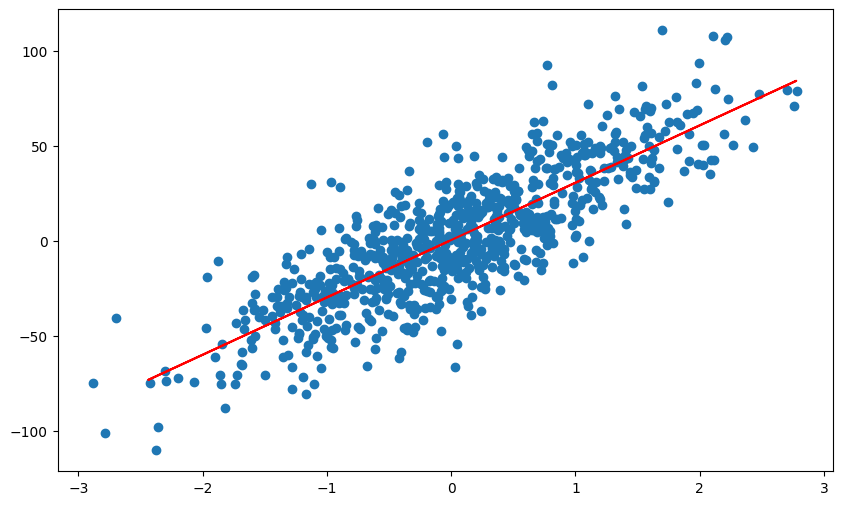

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.scatter(X_train,y_train)    
plt.plot(X_test,predictions,color='red')
plt.show()